# Projet de Web Scraping M1 SDA (IIA) sur des Données Immobilières au Sénégal


<div style="float: right; ">
    <img src="keur-immo.png" alt="Logo de Keur-Immo" width="300"/>
</div>

## Auteurs

Ce projet a été réalisé par :

- Assane GASSAMA
- Papa Ousmane WATT

## Plan

1. **Introduction**
   - Contexte
   - Présentation du projet.
   - Objectifs du projet.

2. **Collecte de Données**
   - Sources de données.
   - Définition du web scraping
   - Limitation
   - Légalité
   
3. **Méthodologie de Web Scraping**
   - Bibliothèques utilisées.
   - Les étapes du web scraping.

4. **Analyse des Données**
   - Prétraitement des données.
   - Analyses statistiques.
   - Corrélation
   - Visualisations (Analyse univariée et bivarié)
   - Traitement valeurs abérantes
   - Test d'hypothèse

5. **Conclusion**
   - Résumé du projet.
   - Perspectives d'amélioration.



# Introduction

Le marché immobilier au Sénégal connaît une croissance rapide, avec une demande constante en biens immobiliers, que ce soit pour la vente ou la location. Dans le cadre de ce projet, nous explorons la possibilité de collecter des données immobilières pertinentes à partir de Keur-Immo, le site d'annonces immobilières numéro 1 au Sénégal.

#### Contexte

Keur-Immo s'est imposé comme une référence dans le domaine des annonces immobilières au Sénégal. La plateforme offre un environnement sécurisé et fiable où seules les agences immobilières professionnelles sont autorisées à publier des annonces, garantissant ainsi la qualité et la véracité des informations présentées.

Dans les sections suivantes, nous détaillerons notre méthodologie de collecte de données, présenterons nos résultats, et discuterons des implications de notre analyse pour le marché immobilier sénégalais. Nous sommes convaincus que ce projet offrira une perspective précieuse sur l'évolution du secteur immobilier au Sénégal grâce à l'exploration des données fournies par Keur-Immo.

#### Présentation du Projet

Dans ce projet, nous allons scraper un site nommé "keur immo" qui est dans le domaine de l'immobilier au Sénégal. nous allons essayer de recuper les détails, les caractéristiques des ventes et des locations. Après cela, nous mettrons en place un ou des modèle(s) pour la prédiction du prix de vente ou de la location.

#### Objectifs du Projet

Les principaux objectifs de ce projet sont les suivants :
- Collecter des données immobilières pertinentes depuis le site Keur-Immo.
- Analyser les tendances du marché immobilier au Sénégal.
- Identifier les caractéristiques les plus recherchées pour les biens immobiliers.

# Collecte de données

#### Sources de Données

Les sites web à partir desquels nous avons extrait des données sont :

- Site Web Location : https://www.keur-immo.com/immobilier-a-louer-senegal/
- Site Web Vente : https://www.keur-immo.com/immobilier-a-vendre-senegal/

#### Definition  de Web Scraping
Le **web scraping**, également appelé extraction de données web, est le processus d'extraction automatique d'informations ou de données à partir de sites web. Cela permet de collecter des données structurées ou non structurées à partir de pages web pour diverses utilisations, telles que l'analyse de données, la recherche, la surveillance, la comparaison de prix, etc.



#### Limitations

Il est important de noter que la collecte de données par web scraping peut comporter certaines limitations. Nous avons fait de notre mieux pour minimiser ces limitations, mais elles incluent :

- **Changements de Structure :** Le site Keur-Immo peut subir des modifications structurelles, ce qui nécessiterait une mise à jour de notre code de web scraping.

- **Limite de Vitesse :** Le scraping intensif peut entraîner des limitations de vitesse sur le site, et nous avons dû gérer ces limitations pour ne pas surcharger le serveur du site.

- **Qualité des Données :** Bien que nous ayons veillé à extraire des données de haute qualité, certaines anomalies peuvent survenir en raison de la nature des données disponibles sur le site.

#### Légalité

Le scraping doit être effectué de manière éthique et légale. vous devez Consultez toujours les politiques d'utilisation du site web que vous scrapez. Certains sites peuvent interdire le scraping ou restreindre son utilisation.

Pour voir les conditions d'utilisations du site web que vous voulez scrapez, ajoutez sur l'url du site «/robots.txt»

# Méthodologie du web scraping

#### Bibliothèques Utilisées

Les bibliothèques Python que nous avons utilisé pour le web scraping sont :

- **Beautiful Soup** : Utilisé pour parcourir et extraire des données à partir du code HTML des pages web.
- **Selenium** : Utilisé pour automatiser l'interaction avec les pages web, notamment pour cliquer sur des boutons ou remplir des formulaires.

#### Les étapes du web scraping


Nous avons utilisé un navigateur web  en conjonction avec la bibliothèque **Selenium** pour automatiser la navigation sur le site.


##### Étape 1: Importations des données

Tout d'abord importons les différentes bibliothèques que nous aurons besoins tout au long du projet

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import re
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pearsonr
from scipy.stats import f_oneway

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


##### Étape 2: Collecte des Liens vers les Détails

Après avoir obtenu toutes les annonces de location, nous avons collecté les liens vers les pages de détails de chaque annonce en utilisant la fonction **All_lins()** :

- C'est une fonction qui n'a pas de paramètre
- On cherche à trouver tous les éléments HTML sur la page qui ont la classe "g5core__entry-thumbnail" ou se trouve les liens.
- Le boucle for qui itère à travers chaque élément trouvé de la classe. Pour chaque élément, on extrait l'attribibut "href" pour recuperer l'url et de l'ajouter sur une liste
- la fonction retourne une liste qui contient toutes les urls extraites.


In [ ]:
def All_links() :

    elements_with_class= driver.find_elements('class name',"g5core__entry-thumbnail")
    elements_with_class
    links = []
    for element in elements_with_class:
        #print(element.get_attribute("href"))
        links.append(element.get_attribute("href"))

    return links


##### Étape 3: Récupération des Détails d'un annonce

1. Nous avons parcouru chaque lien d'annonce individuellement.

2. À l'aide de la bibliothèque **Beautiful Soup**, nous avons créé une fonction **get_advertisement_content** qui permet d'extraire les détails de chaque annonce, notamment les caractéristiques principales, les informations sur le prix, la localisation, les équipements, etc.

En résumé, cette fonction effectue les étapes suivantes :

- Elle prend le code source HTML d'une page web comme entrée.
- Utilise BeautifulSoup pour analyser le HTML et le transformer en un objet que Python peut manipuler facilement.
- Recherche tous les éléments «div» qui correspondent aux modèles regex spécifiés pour les détails de la propriété et les caractéristiques de la propriété.
- Boucle à travers ces éléments, extrait les données (clé-valeur) et les stocke dans un dictionnaire.
- Retourne le dictionnaire contenant les données extraites de la page web.

In [ ]:
def get_advertisement_content(page_source):
    #page = get_page(url_ad)
    soup = BeautifulSoup(page_source, "html.parser")
    pattern = re.compile(r"d-flex g5ere__property")
    details_property = soup.find_all(name = "div", class_=pattern)
    pattern_features = re.compile(r"d-flex align-items-center g5ere__property-feature-item")
    features = soup.find_all(name = "div", class_=pattern_features)
    dict = {}
    for detail in details_property:
        dict[detail.find("strong").text] = detail.find("span").get_text(strip=True)
    for feature in features:
        dict[feature.find("a").text] = True
    return dict

##### Étape 4: Récupération des Détails de tout les annonces

Nous avons un fonction qui recupère tout les liens d'annonce et une autre qui extrait les détails de chaque annonce, alors mettons en place une fonction **articles** qui retourne l'ensemble des caractéristiques des différentes annonces.

- La fonction prend une liste de liens d'annonce en entrée.

- Une boucle for qui parcourt tout les liens en accédant sur sa page et pour chaque page, on utilise la fonction get_advertisement_content() pour extraire le contenu (details et caracteristiques) de la page web .

- la fonction retourne une liste contenant les éléments extraits de chaque page web

In [ ]:
def articles(links) :

    list_articles = []
    for link in links :
    # Accédez à chaque lien directement
        driver.get(link)

        list_articles.append(get_advertisement_content(driver.page_source))

    return list_articles

Si vous consultez la page de Keur immo https://www.keur-immo.com , vous verrez qu'il y a 20 annonces présent mais on note la présence d'un bouton **Plus** qui permet de générer d'autres annonces. Alors nous allons créer une fonction **click_bouton_plus** qui gère ce bouton. Cette fonction aura pour but, une fois la page chargée, de cliquer de manière répétée sur le bouton "Plus" pour charger davantage les annonces. Cette étape a été répétée jusqu'à ce que le bouton "Plus" ne soit plus disponible, assurant ainsi que toutes les annonces de location ou de vente étaient récupérées.

- La fonction prend l'url en entrée qu'elle accèdera.
- elle définit un délai d'attente explicite (wait) de 15 secondes pour attendre que le bouton "Plus" soit présent.

- La boucle while qui permet d'essayer de cliquer sur le bouton "Plus" jusqu'à ce qu'il ne soit plus présent.

- Sur la boucle, on va utiliser **try** pour trouver le bouton **Plus** c'est-à-dire qu'il est chargé et affiché à l'écran. Une fois que le bouton **Plus** est visible, on clique sur le bouton.

- Si le bouton "Plus" n'est plus présent (par exemple, il n'y a plus de nouveaux éléments à charger), une exception est levée, ce qui fait sortir de la boucle while.

- Utlisation de la fonction All_links() pour extraire les liens de tous les éléments sur la page web.

- Enfin, la liste des liens extraits est retournée .


In [ ]:
def click_bouton_plus(url) :
    # Ouvrez la page web
    driver.get(url)

    # Définissez un délai d'attente explicite pour attendre que le bouton "Plus" soit présent
    wait = WebDriverWait(driver, 15)

    while True:
        try:
            # Attendez que le bouton "Plus" soit visible
            more_button = wait.until(EC.visibility_of_element_located((By.LINK_TEXT, 'Plus')))
            # Cliquez sur le bouton "Plus"
            more_button.click()

        except Exception:
            # Le bouton n'est plus présent, sortir de la boucle
            break
    links = All_links()

    return links


Maintenant que nous avons créé tout les fonctions que nous avons besoin pour la collecte des données. Alors essayons de faire des tests de nos fonctions.

Démarrons notre navigateur

In [ ]:
driver = webdriver.Chrome()

Prenez l'url d'une annonce au hasard pour voir comment les éléments seront recupérés et affichés en utilisant **get_advertisement_content**

In [ ]:
url = 'https://www.keur-immo.com/annonce-immobiliere-senegal/dakar-plateau-appartement-de-2-chambres-a-louer/'

In [ ]:
driver.get(url)

get_advertisement_content(driver.page_source)

{'Référence': '29831',
 'Prix': '2 600 000 FCFA/ mois',
 'Type de bien': 'Appartement',
 'Statut du bien': 'Location',
 'Nombre total de pièces': '3',
 'Chambres': '2',
 'Salles de bains': '2',
 'Année de construction': '2022',
 'Superficie': '150 m2',
 'Pays': 'Senegal',
 'Province/Région': 'Dakar',
 'Ville': 'Plateau',
 'Ascenseur': 1,
 'Climatisation': 1,
 'Cuisine équipée': 1,
 'Fibre optique': 1,
 'Garage / parking': 1,
 'Groupe électrogène': 1,
 'Internet / Wifi': 1,
 'Piscine': 1,
 'Proche commodités': 1,
 "Réservoir d'eau": 1,
 'Terrasse': 1}

Voici les urls de la catégorie Location et Vente

In [ ]:
url_loc = "https://www.keur-immo.com/immobilier-a-louer-senegal"
url_vente = "https://www.keur-immo.com/immobilier-a-vendre-senegal/"

Appliquons la fonction **click_bouton_plus** pour charger tout les annonces de location et de vente afin de recuperer leurs liens

In [ ]:
links_loc = click_bouton_plus(url_loc)

len(links_loc)

300


In [ ]:
links_vente = click_bouton_plus(url_vente)

len(links_vente)

842


Nous avons 300 annonces de location et 842 annones de ventes

**NB** : Notez bien que ces chiffres peuvent changer à tout moment à cause des mises à jour du site

In [ ]:
links = links_loc + links_vente

len(links)

1142


Recupérons maintenant tout les annonces

In [ ]:
list_articles = articles(links)

len(list_articles)

1142


La liste des articles est une liste contenant des dictionnaires. Ces derniers représentent les différentes annonces

In [ ]:
data = pd.DataFrame(list_articles)

Nous stockons les données de notre dataframe dans un fichier **csv** car son chargement prend du temps.


In [ ]:
data.to_csv('vent_et_loc.csv', index=False)

In [ ]:
data = pd.read_csv('vent_et_loc.csv')

In [ ]:
data.head()

,Référence,Prix,Type de bien,Statut du bien,Nombre total de pièces,Chambres,Salles de bains,Année de construction,Superficie,Garages,...,Rez-de-chaussée,Superficie terrain,Dernier étage,Câble TV,Studio indépendant,Accès direct plage,Barbecue,Toit en paille,Toit en tuile,Energie solaire
0,35371,3 000 000 FCFA/ mois,Appartement,Location,4.0,3.0,3.0,2022.0,250 m2,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29831,2 600 000 FCFA/ mois,Appartement,Location,3.0,2.0,2.0,2022.0,150 m2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29639,3 500 000 FCFA/ mois,Appartement,Location,4.0,4.0,4.0,2023.0,380 m2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29166,2 800 000 FCFA/ mois,Appartement,Location,4.0,3.0,3.0,2021.0,260 m2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,38639,1 000 000 FCFA/ mois,Studio/Chambre,Location,2.0,1.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Référence               1142 non-null   object 
 1   Prix                    1142 non-null   object 
 2   Type de bien            1142 non-null   object 
 3   Statut du bien          1142 non-null   object 
 4   Nombre total de pièces  1139 non-null   float64
 5   Chambres                655 non-null    float64
 6   Salles de bains         637 non-null    float64
 7   Année de construction   220 non-null    float64
 8   Superficie              532 non-null    object 
 9   Garages                 292 non-null    float64
 10  Pays                    1088 non-null   object 
 11  Province/Région         1131 non-null   object 
 12  Ville                   1142 non-null   object 
 13  Ascenseur               151 non-null    object 
 14  Climatisation           449 non-null    

In [ ]:
data.shape

(1142, 40)

Si nous regardons les colonnes comme Prix, Superficie, etc , nous voyons que c'est une chaine de caractère  composé de chiffre et lettre. Nous allons créer une fonction **extract_value** prend en entrée une chaîne de caractères (dans notre cas, une valeur de la colonne du DataFrame) comme au format "3 000 000 FCFA/mois". L'objectif de cette fonction est d'extraire la valeur numérique (par exemple, "3000000") de cette chaîne.

In [ ]:
# Fonction pour extraire les valeurs

def extract_value(text):
    #recherc = re.search(r'([\d\s,]+)', text)
    if pd.isnull(text):
        return np.nan

    recherc = re.search(r'([\d\s,]+)', text)
    if recherc:
        value = recherc.group(1).replace(' ', '').replace(',', '')
        return value
    return np.nan

In [ ]:
data["Prix"]=data["Prix"].apply(extract_value)

data["Superficie"]=data["Superficie"].apply(extract_value)

data['Superficie garage'] = data['Superficie garage'].apply(extract_value)

data['Superficie terrain'] = data['Superficie terrain'].apply(extract_value)

data.head()

,Référence,Prix,Type de bien,Statut du bien,Nombre total de pièces,Chambres,Salles de bains,Année de construction,Superficie,Garages,...,Rez-de-chaussée,Superficie terrain,Dernier étage,Câble TV,Studio indépendant,Accès direct plage,Barbecue,Toit en paille,Toit en tuile,Energie solaire
0,35371,3000000,Appartement,Location,4.0,3.0,3.0,2022.0,250,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29831,2600000,Appartement,Location,3.0,2.0,2.0,2022.0,150,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29639,3500000,Appartement,Location,4.0,4.0,4.0,2023.0,380,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29166,2800000,Appartement,Location,4.0,3.0,3.0,2021.0,260,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,38639,1000000,Studio/Chambre,Location,2.0,1.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Transformation des types de variables

il y a des variables qui ont des types qu'il ne devraient pas avoir. Donc on va essayer de transformer ses variables à un type appropié

In [ ]:
var_N= ['Prix','Superficie','Superficie garage','Superficie terrain']
for var in var_N :
    data[var] = pd.to_numeric(data[var], errors='coerce')

In [ ]:
data.isnull().sum()

Référence                    0
Prix                         4
Type de bien                 0
Statut du bien               0
Nombre total de pièces       3
Chambres                   487
Salles de bains            505
Année de construction      922
Superficie                 610
Garages                    850
Pays                        54
Province/Région             11
Ville                        0
Ascenseur                  991
Climatisation              693
Cuisine équipée            682
Fibre optique              973
Garage / parking           696
Groupe électrogène         959
Proche commodités          718
Réservoir d'eau            803
Terrasse                   725
Internet / Wifi            950
Piscine                    760
Local gardien              846
Meublé                     831
Étiquette du bien          960
Superficie garage         1107
Titre foncier             1056
Jardin                     778
Rez-de-chaussée           1040
Superficie terrain         463
Dernier 

# Analyse des données

### Traitement des données

##### Les valeurs manquantes

Tout les variables de type boolean qui ont des valeurs manquantes seront remplacées par False car tout les autres valeurs sont à True


In [ ]:
col_ayant_nan_bool = data[['Ascenseur','Climatisation',
                      'Cuisine équipée','Fibre optique', 'Garage / parking', 'Groupe électrogène',
                      'Proche commodités',"Réservoir d'eau", 'Terrasse','Internet / Wifi', 'Piscine',
                      'Titre foncier', 'Jardin','Rez-de-chaussée','Dernier étage', 'Câble TV','Meublé',
                      'Accès direct plage', 'Barbecue', 'Toit en tuile',
                      'Studio indépendant','Local gardien','Toit en paille', 'Energie solaire']]

for var in col_ayant_nan_bool :
    data[var].fillna(False, inplace = True)


Parfois une annonce peut avoir des détails que d'autres n'ont pas. Si l'annonce a des détails manquantes et la variable a des chiffres comme éléments, alors les valeurs manquantes seront mis à 0.

In [ ]:
col_ayant_nan_nul = data[['Chambres','Salles de bains','Garages', 'Superficie garage',
                           'Nombre total de pièces']]

for var in col_ayant_nan_nul :
    data[var].fillna(0, inplace = True)


Pour des variables comme Superficie, Prix, ect nous allons faire une imputation par la mediane

In [ ]:
imput_med = ['Superficie', 'Prix', 'Superficie terrain']

for var in imput_med :
    median = data[var].median()
    data[var].fillna(median, inplace=True)

In [ ]:
data['Année de construction'] = data['Année de construction'].astype('object')

data['Année de construction'].fillna('Inconnu', inplace = True)

Pour les variables de type objet, l'imputation se fait avec la mode

In [ ]:
imput_mod = ['Pays', 'Province/Région', 'Étiquette du bien']

for var in imput_mod :
    mod = data[var].mode()[0]
    data[var].fillna(mod, inplace=True)

In [ ]:
data.isnull().sum()

Référence                 0
Prix                      0
Type de bien              0
Statut du bien            0
Nombre total de pièces    0
Chambres                  0
Salles de bains           0
Année de construction     0
Superficie                0
Garages                   0
Pays                      0
Province/Région           0
Ville                     0
Ascenseur                 0
Climatisation             0
Cuisine équipée           0
Fibre optique             0
Garage / parking          0
Groupe électrogène        0
Proche commodités         0
Réservoir d'eau           0
Terrasse                  0
Internet / Wifi           0
Piscine                   0
Local gardien             0
Meublé                    0
Étiquette du bien         0
Superficie garage         0
Titre foncier             0
Jardin                    0
Rez-de-chaussée           0
Superficie terrain        0
Dernier étage             0
Câble TV                  0
Studio indépendant        0
Accès direct plage  

Tout les valeurs manquantes ont été traité

##### Statistique descriptive

In [ ]:
data_quali = data.select_dtypes(['object', 'bool'])

data_quanti = data.select_dtypes(['int', 'float'])

In [ ]:
data_quali.describe()

,Référence,Type de bien,Statut du bien,Année de construction,Pays,Province/Région,Ville,Ascenseur,Climatisation,Cuisine équipée,...,Jardin,Rez-de-chaussée,Dernier étage,Câble TV,Studio indépendant,Accès direct plage,Barbecue,Toit en paille,Toit en tuile,Energie solaire
count,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142,...,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142
unique,1139,12,4,26,1,3,76,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,013008,Villa/Maison,Achat,Inconnu,Senegal,Thiès / Petite Côte,Ngaparou,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,2,430,841,922,1142,778,163,991,693,682,...,778,1040,1102,977,1034,1032,1075,1128,1095,1069


In [ ]:
data_quanti.describe()

,Prix,Nombre total de pièces,Chambres,Salles de bains,Superficie,Garages,Superficie garage,Superficie terrain
count,1.142000e+03,1142.000000,1142.000000,1142.000000,1.142000e+03,1142.000000,1142.000000,1142.000000
mean,1.663859e+08,3.878284,2.222417,2.108581,1.595892e+04,10.818739,1.528021,2846.793345
std,6.223851e+08,4.935880,2.497941,2.538837,3.742576e+05,355.711179,15.064181,9325.039044
min,3.000000e+03,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2.800000e+06,0.000000,0.000000,0.000000,2.610000e+02,0.000000,0.000000,698.500000
50%,4.281850e+07,4.000000,2.000000,2.000000,2.610000e+02,0.000000,0.000000,900.000000
75%,1.700000e+08,6.000000,4.000000,4.000000,2.610000e+02,0.000000,0.000000,1100.000000
max,1.100000e+10,62.000000,19.000000,25.000000,1.200000e+07,12021.000000,300.000000,149940.000000


##### Corrélation

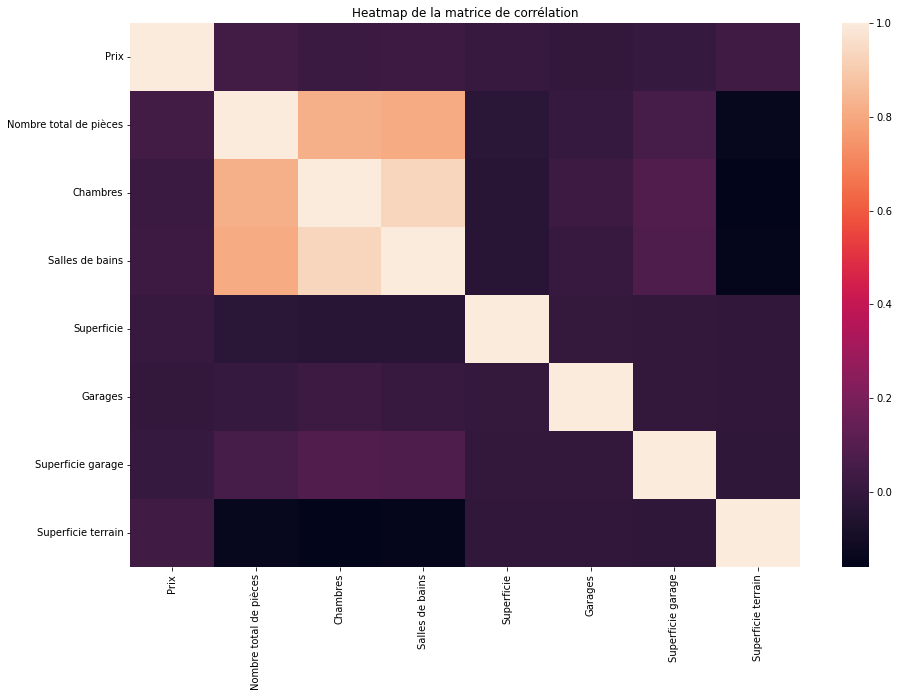

In [ ]:
correlation_matrix = data_quanti.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False)
plt.title('Heatmap de la matrice de corrélation')
plt.show()


In [ ]:
cible = 'Prix'

correlation_matrix[cible]

Prix                      1.000000
Nombre total de pièces    0.045094
Chambres                  0.020921
Salles de bains           0.027804
Superficie                0.008805
Garages                  -0.001796
Superficie garage         0.007118
Superficie terrain        0.036889
Name: Prix, dtype: float64

##### Analyse univariée

C:\Users\Gassama Assane\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gassama Assane\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gassama Assane\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

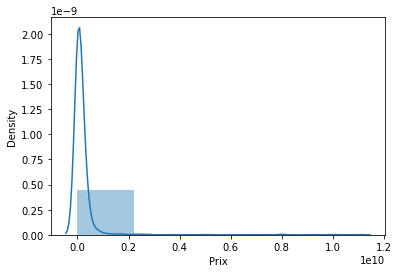

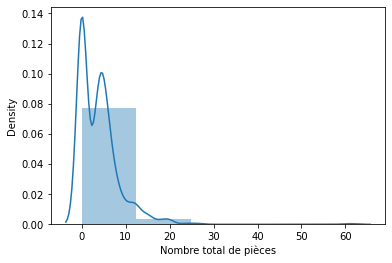

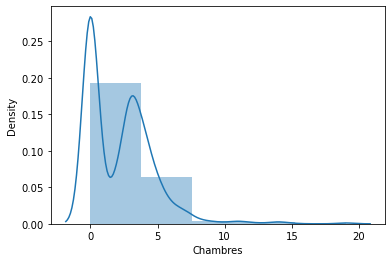

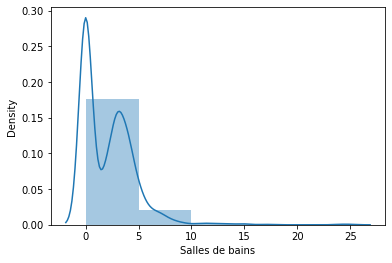

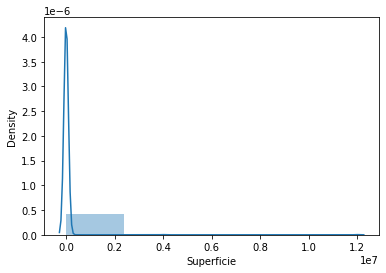

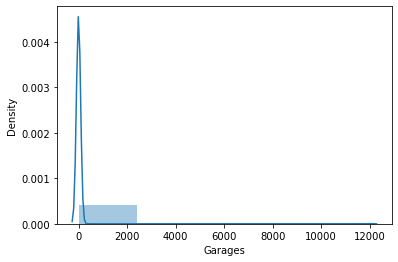

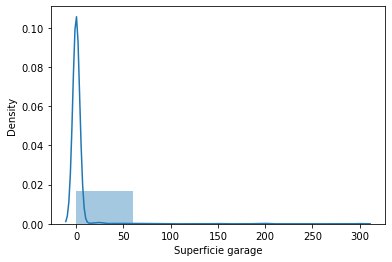

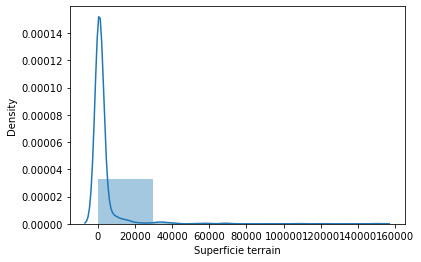

In [ ]:
for var in data_quanti:
    plt.figure()
    sns.distplot(data_quanti[var], bins = 5)

Visualisation des valeurs abérants

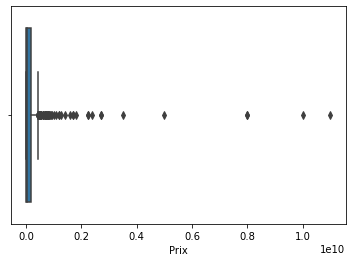

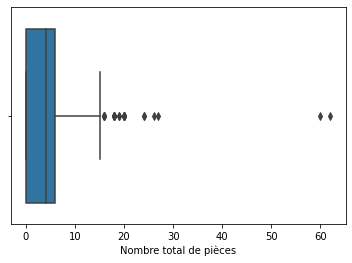

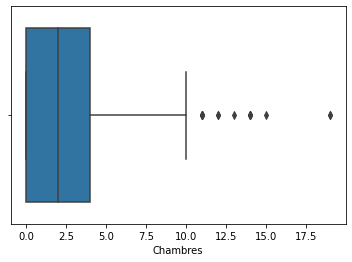

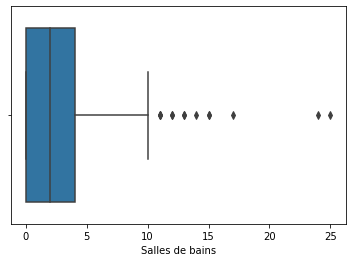

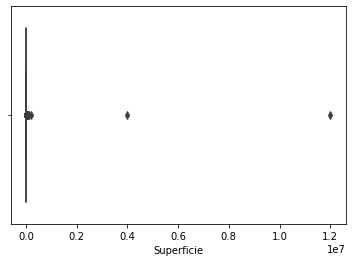

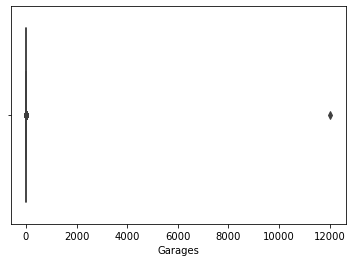

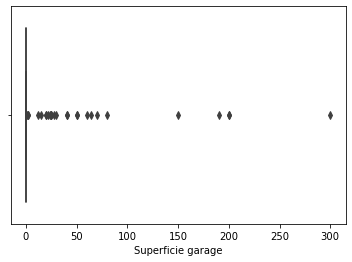

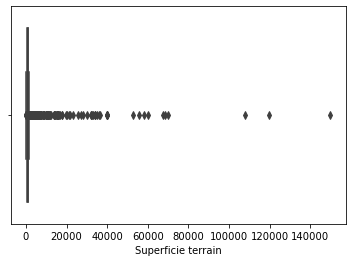

In [ ]:
for var in data_quanti :
    plt.figure()
    sns.boxplot(x= var, data=data_quanti)


C:\Users\Gassama Assane\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Gassama Assane\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Gassama Assane\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\U

C:\Users\Gassama Assane\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Gassama Assane\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Gassama Assane\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\U

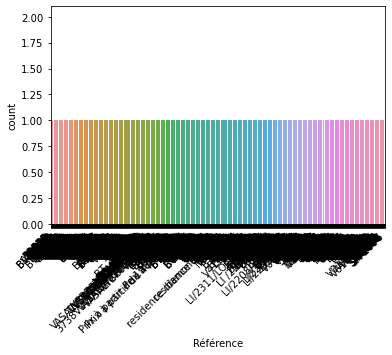

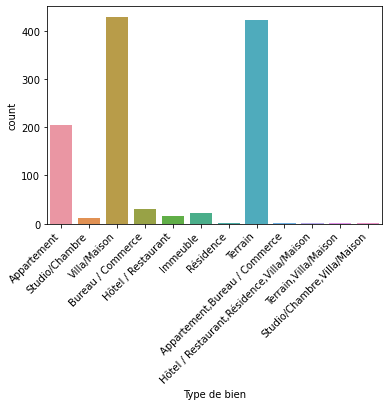

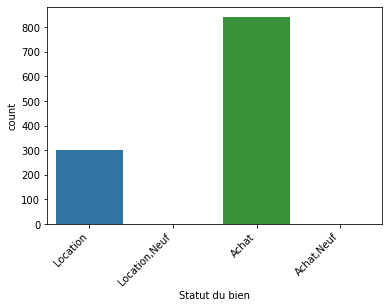

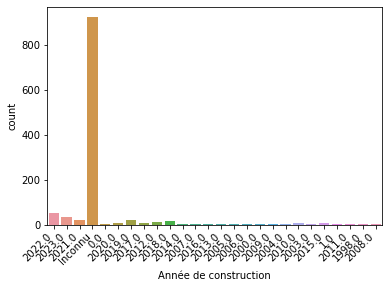

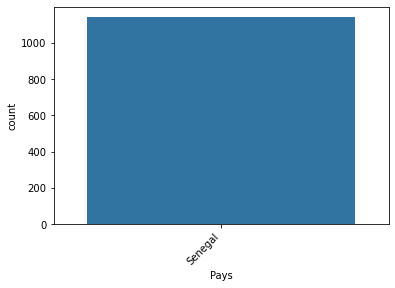

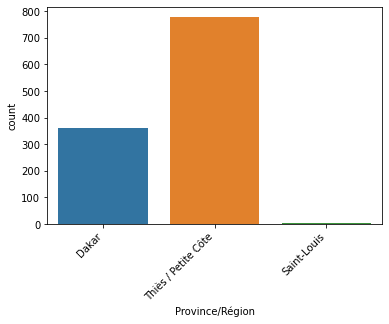

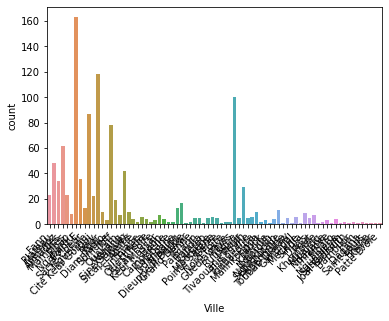

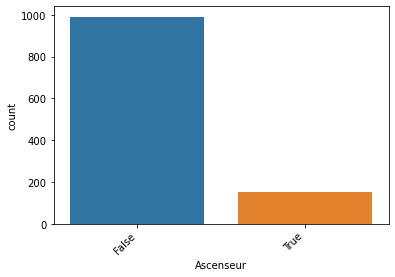

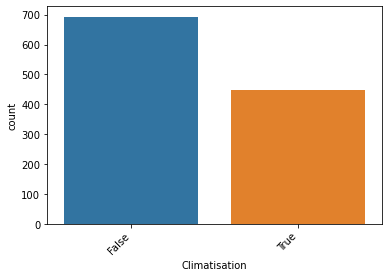

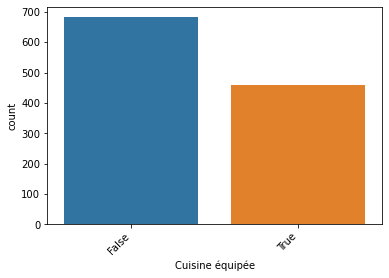

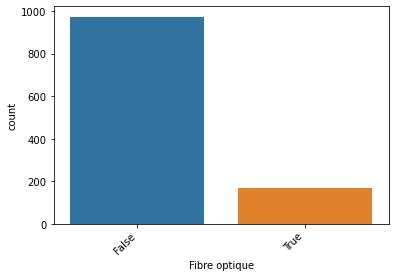

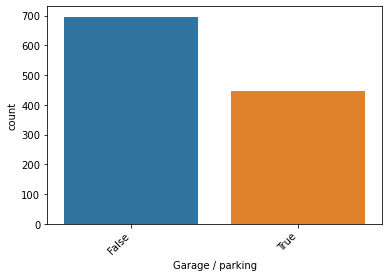

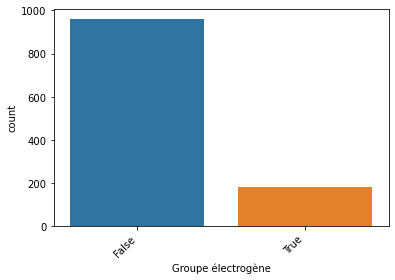

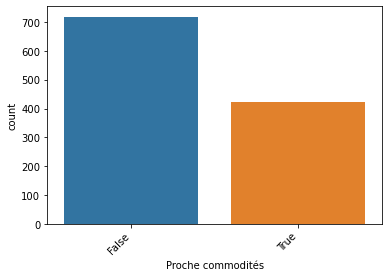

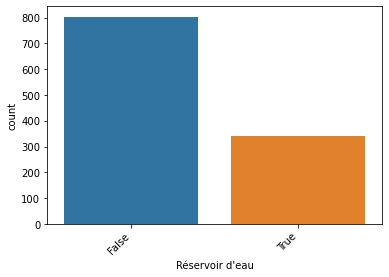

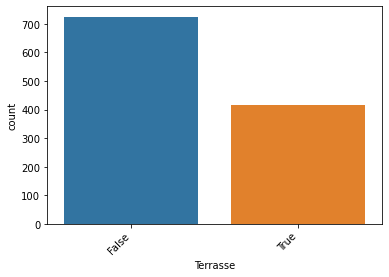

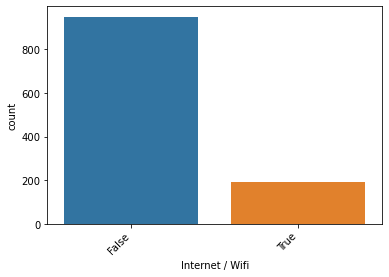

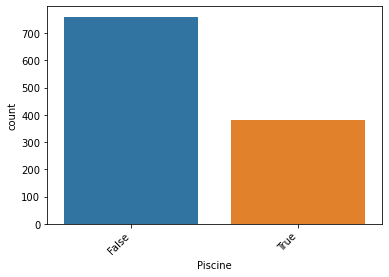

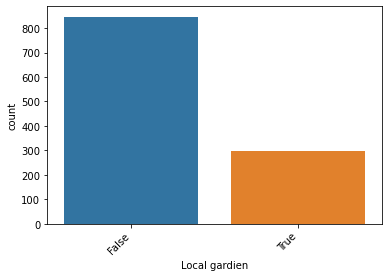

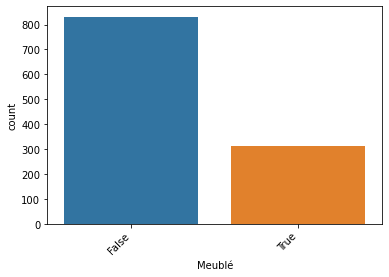

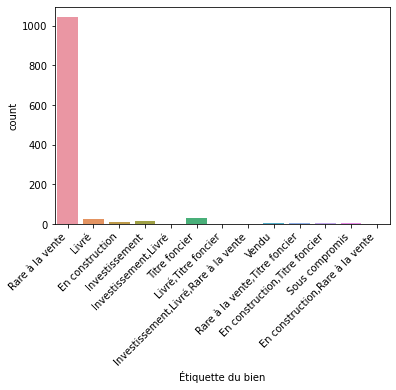

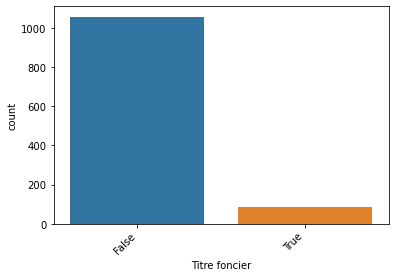

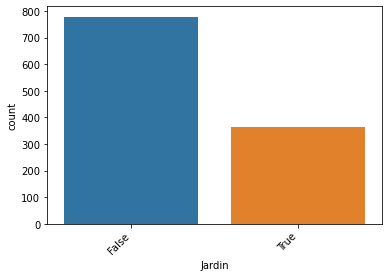

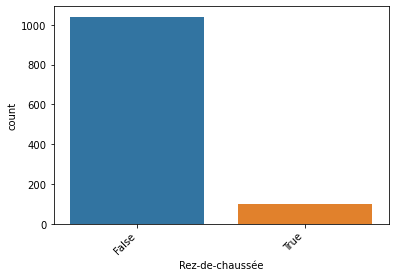

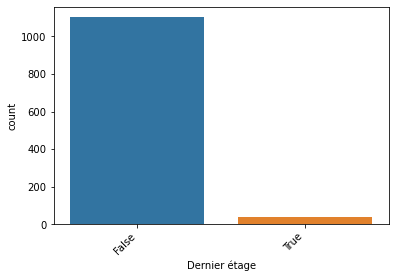

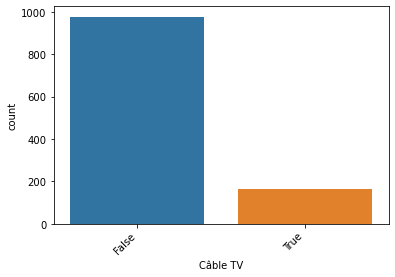

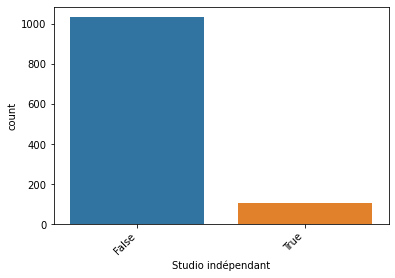

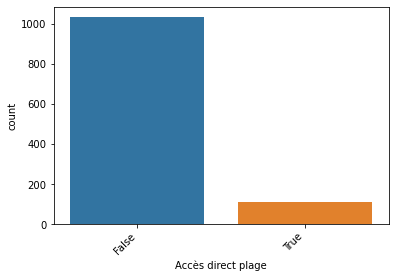

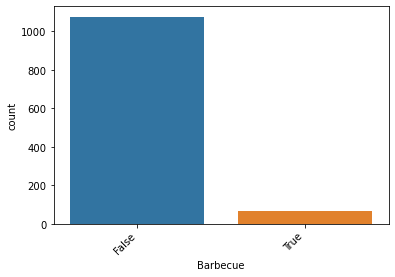

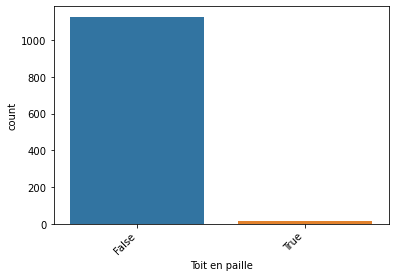

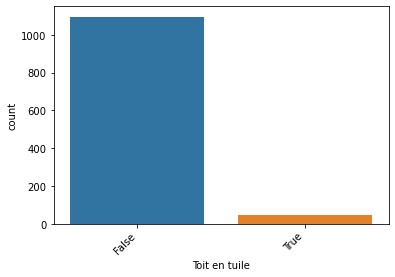

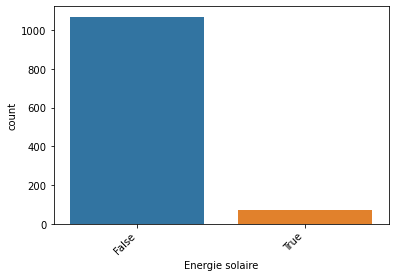

In [ ]:
for var in data_quali :
    plt.figure()
    sns.countplot(data_quali[var])
    plt.xticks(rotation=45, ha='right')

##### Analyse bivariée

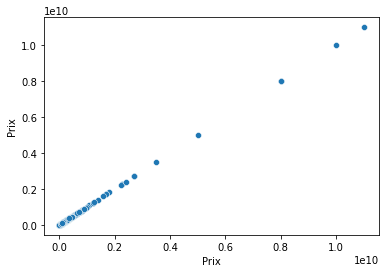

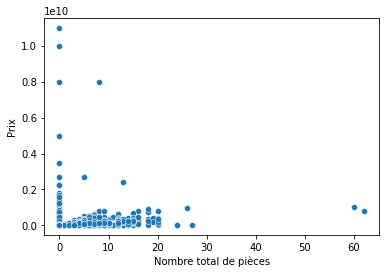

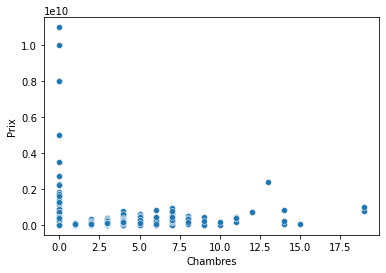

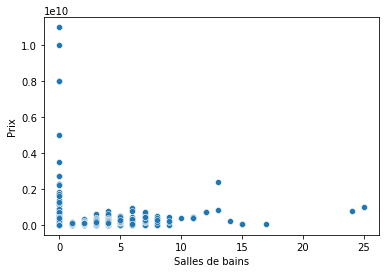

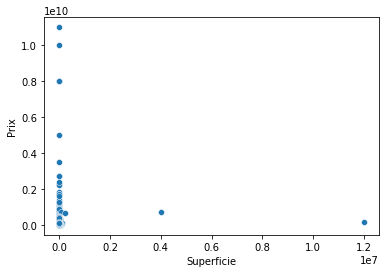

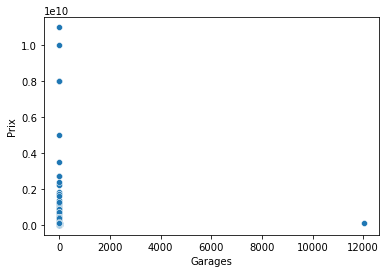

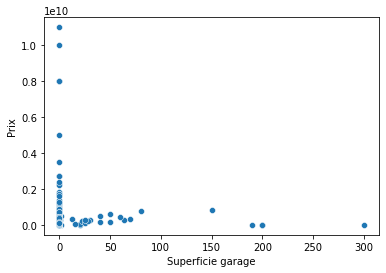

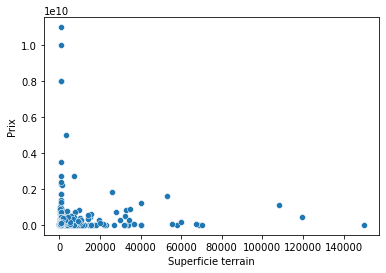

In [ ]:
for var in data_quanti :
    sns.scatterplot(x= var, y=cible , data = data)
    plt.show()

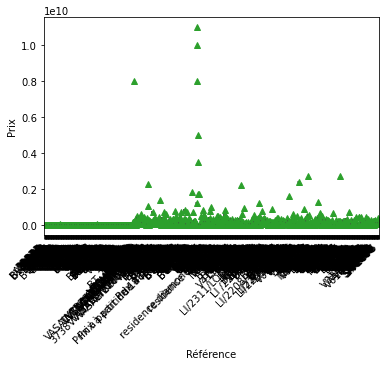

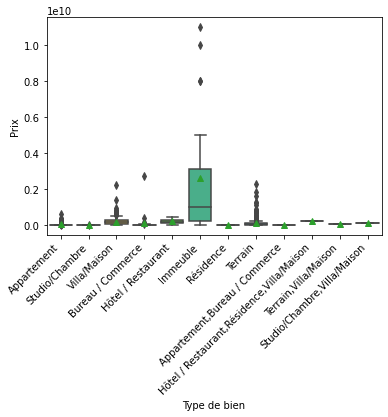

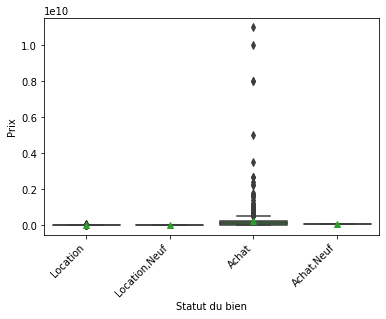

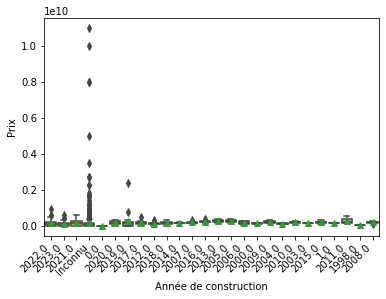

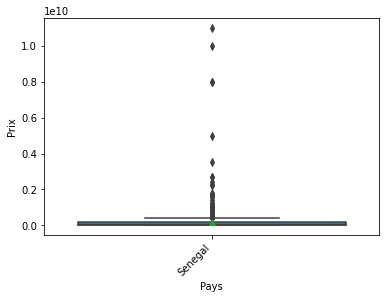

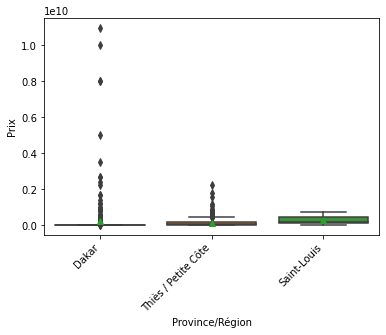

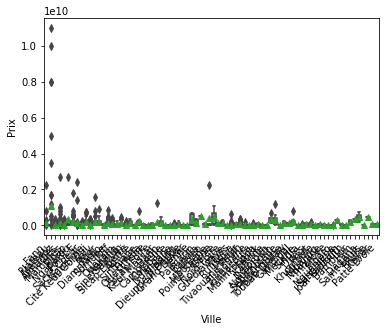

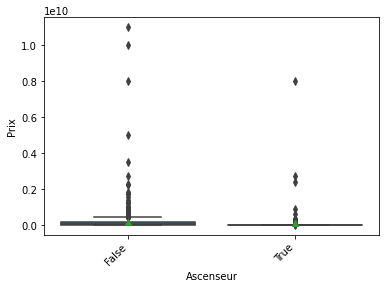

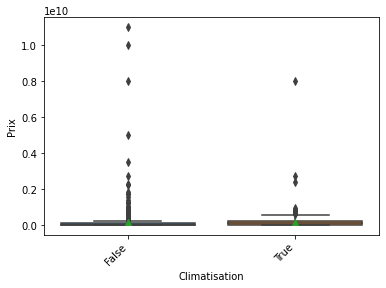

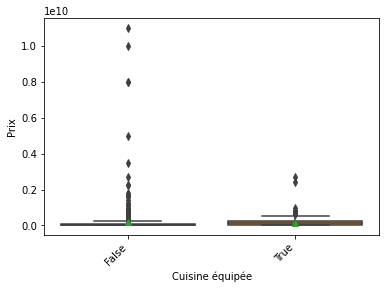

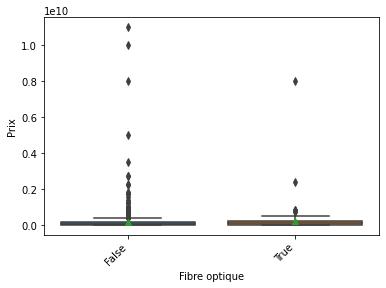

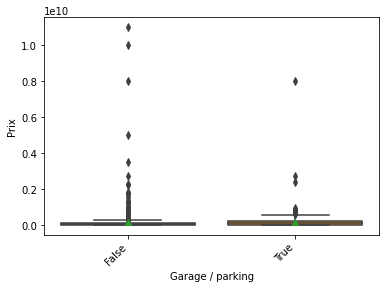

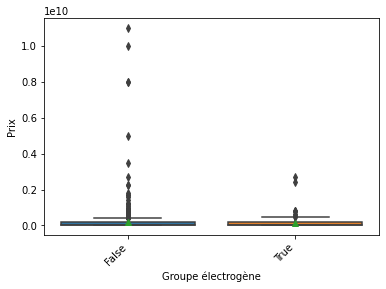

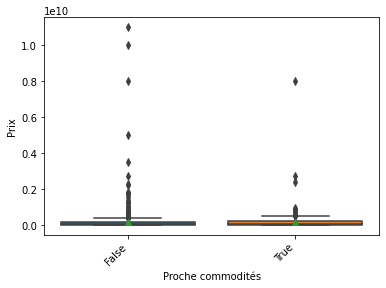

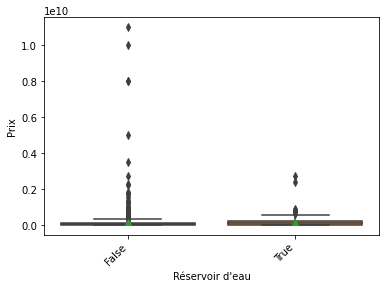

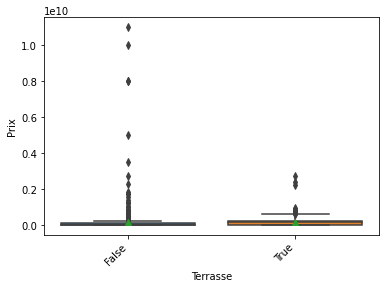

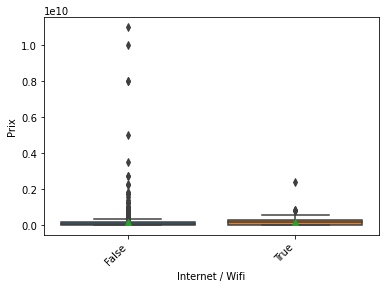

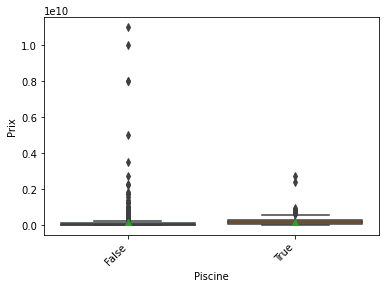

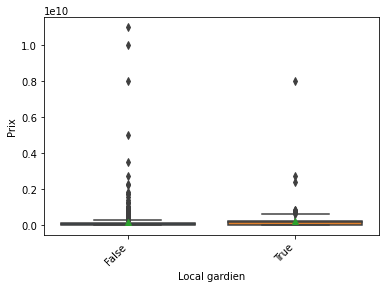

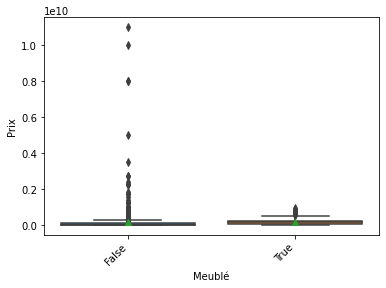

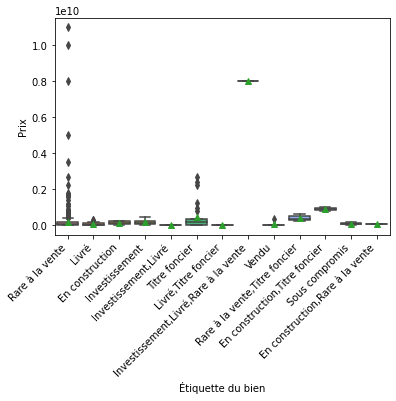

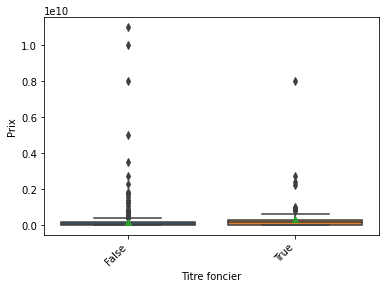

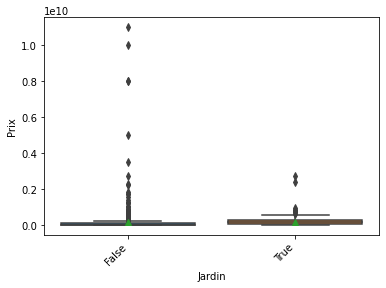

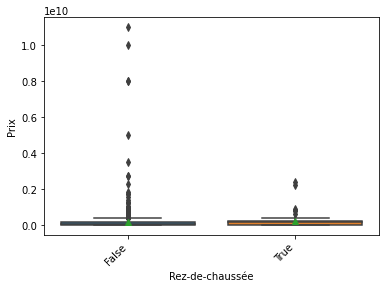

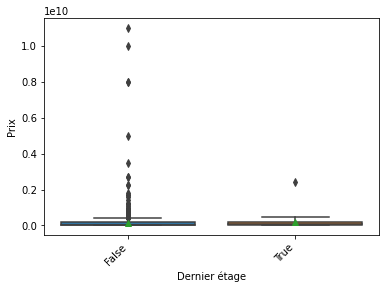

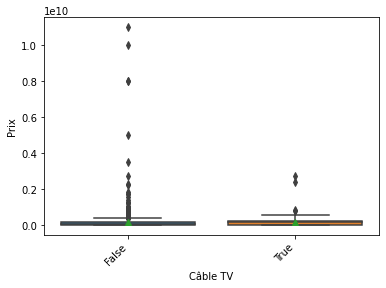

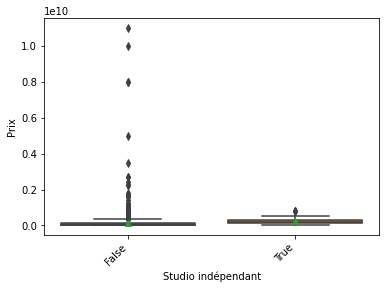

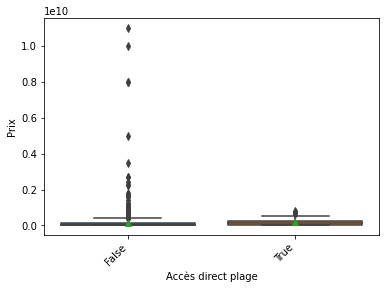

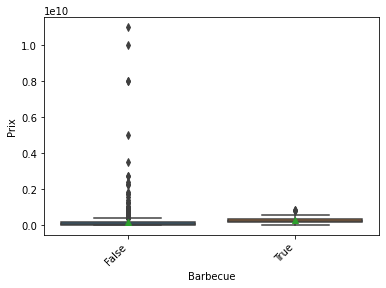

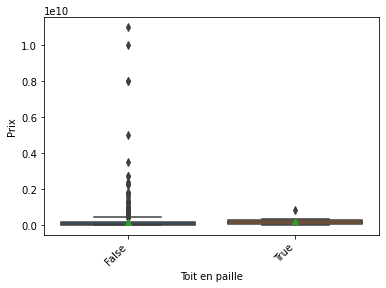

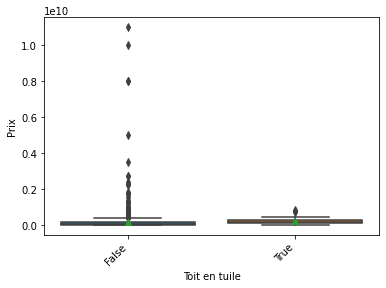

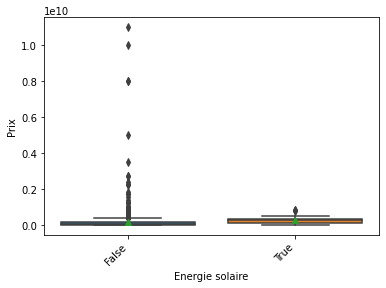

In [ ]:
for var in data_quali :
    sns.boxplot(data = data, x= var, y=cible , showmeans = True )
    plt.xticks(rotation=45, ha='right')
    plt.show()

##### Traitement valeurs abérantes

Pour être une valeur aberrante, la valeur des données doit être : supérieure à Q3 d'au moins 1,5 fois l'écart interquartile (IQR) ou inférieure à Q1 d'au moins 1,5 fois l'IQR.

In [ ]:

for var in data_quanti:
    med = data[var].median()
    Q1 = data[var].quantile(0.25)
    Q3 = data[var].quantile(0.75)
    IQR = Q3 - Q1
    # Définition des seuils pour identifier les valeurs aberrantes
    threshold_min = Q1 - 1.5 * IQR
    threshold_max = Q3 + 1.5 * IQR

    #Imputation des valeurs aberrantes par le mediane
    data[var] = np.where((data[var] < threshold_min) | (data[var] > threshold_max), med, data[var])

##### Test d'hypothèse

In [ ]:
from scipy.stats import pearsonr
from scipy.stats import f_oneway

var_significative_quanti=[]
for var in data_quanti:
    if var!=cible :
        correlation, p_value = pearsonr(data[var], data[cible])
        print(f'Test de corrélation entre {var} et {cible}: Corrélation = {correlation}, p_value = {p_value}')
        if p_value < 0.05:
            print("La corrélation est statistiquement significative.\n")
            var_significative_quanti.append(var)
        else:
            print("La corrélation n'est pas statistiquement significative.\n")

Test de corrélation entre Nombre total de pièces et Prix: Corrélation = 0.2689257824505993, p_value = 2.268269692916651e-20
La corrélation est statistiquement significative.

Test de corrélation entre Chambres et Prix: Corrélation = 0.33601219207761857, p_value = 1.5392141280252082e-31
La corrélation est statistiquement significative.

Test de corrélation entre Salles de bains et Prix: Corrélation = 0.32535655987163214, p_value = 1.4450641195595296e-29
La corrélation est statistiquement significative.

Test de corrélation entre Superficie et Prix: Corrélation = nan, p_value = nan
La corrélation n'est pas statistiquement significative.

Test de corrélation entre Garages et Prix: Corrélation = nan, p_value = nan
La corrélation n'est pas statistiquement significative.

Test de corrélation entre Superficie garage et Prix: Corrélation = nan, p_value = nan
La corrélation n'est pas statistiquement significative.

Test de corrélation entre Superficie terrain et Prix: Corrélation = -0.124013848

In [ ]:
var_significative_quali = []

for var in data_quali:
    print(f"Test d'ANOVA entre '{var}' et '{cible}' : ")
    groups = [data[data[var] == group][cible] for group in data[var].unique()]
    if len(groups) >= 2 :
        stat, p_value = f_oneway(*groups)
        print(f'p_value: {p_value}, stats : {stat}')

        if p_value < 0.05:
                print("Il y a une différence statistiquement significative entre les groupes.\n")
                var_significative_quali.append(var)
        else:
                print("Il n'y a pas de différence statistiquement significative entre les groupes.\n")



Test d'ANOVA entre 'Référence' et 'Prix' : 
p_value: 0.013670092605728611, stats : 21.103166295524694
Il y a une différence statistiquement significative entre les groupes.

Test d'ANOVA entre 'Type de bien' et 'Prix' : 
p_value: 4.505645248444459e-61, stats : 32.951096142566406
Il y a une différence statistiquement significative entre les groupes.

Test d'ANOVA entre 'Statut du bien' et 'Prix' : 
p_value: 1.5019162102816868e-64, stats : 114.00566009493862
Il y a une différence statistiquement significative entre les groupes.

Test d'ANOVA entre 'Année de construction' et 'Prix' : 
p_value: 8.079963660281922e-11, stats : 4.112258186869764
Il y a une différence statistiquement significative entre les groupes.

Test d'ANOVA entre 'Pays' et 'Prix' : 
Test d'ANOVA entre 'Province/Région' et 'Prix' : 
p_value: 2.0727256623689057e-31, stats : 75.2207056473938
Il y a une différence statistiquement significative entre les groupes.

Test d'ANOVA entre 'Ville' et 'Prix' : 
p_value: 2.83706673886

In [ ]:
var_significative = var_significative_quanti + var_significative_quali
var_significative

['Nombre total de pièces',
 'Chambres',
 'Salles de bains',
 'Superficie terrain',
 'Référence',
 'Type de bien',
 'Statut du bien',
 'Année de construction',
 'Province/Région',
 'Ville',
 'Ascenseur',
 'Climatisation',
 'Cuisine équipée',
 'Fibre optique',
 'Garage / parking',
 'Proche commodités',
 "Réservoir d'eau",
 'Terrasse',
 'Internet / Wifi',
 'Piscine',
 'Local gardien',
 'Meublé',
 'Jardin',
 'Rez-de-chaussée',
 'Câble TV',
 'Studio indépendant',
 'Accès direct plage',
 'Barbecue',
 'Toit en paille',
 'Toit en tuile',
 'Energie solaire']

In [ ]:
data_sign = data[var_significative]
data_sign

,Nombre total de pièces,Chambres,Salles de bains,Superficie terrain,Référence,Type de bien,Statut du bien,Année de construction,Province/Région,Ville,...,Meublé,Jardin,Rez-de-chaussée,Câble TV,Studio indépendant,Accès direct plage,Barbecue,Toit en paille,Toit en tuile,Energie solaire
0,4.0,3.0,3.0,900.0,35371,Appartement,Location,2022.0,Dakar,Fann,...,False,False,False,False,False,False,False,False,False,False
1,3.0,2.0,2.0,900.0,29831,Appartement,Location,2022.0,Dakar,Plateau,...,False,False,False,False,False,False,False,False,False,False
2,4.0,4.0,4.0,900.0,29639,Appartement,Location,2023.0,Dakar,Plateau,...,False,False,False,False,False,False,False,False,False,False
3,4.0,3.0,3.0,900.0,29166,Appartement,Location,2021.0,Dakar,Plateau,...,False,False,False,False,False,False,False,False,False,False
4,2.0,1.0,2.0,900.0,38639,Studio/Chambre,Location,Inconnu,Dakar,Mermoz,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,4.0,0.0,0.0,900.0,V0295,Villa/Maison,Achat,Inconnu,Thiès / Petite Côte,Saly,...,True,True,False,True,True,True,False,False,True,False
1138,12.0,4.0,3.0,1063.0,V0299,Villa/Maison,Achat,Inconnu,Thiès / Petite Côte,Nguerine,...,True,True,True,True,False,False,False,False,False,False
1139,3.0,2.0,1.0,900.0,SA-2098,Villa/Maison,Achat,Inconnu,Thiès / Petite Côte,Saly,...,True,False,False,False,False,False,False,False,False,False
1140,5.0,3.0,1.0,550.0,V.I 2676,Villa/Maison,Achat,Inconnu,Thiès / Petite Côte,Saly,...,True,True,True,True,False,True,False,False,True,False


# Conclusion

En conclusion, notre projet de web scraping "Keur-Immo" a été une expérience d'apprentissage précieuse dans le domaine de l'acquisition de données en ligne. Nous avons entrepris ce projet avec l'objectif de collecter des données pertinentes liées à l'immobilier et de les rendre accessibles pour une analyse ultérieure. Tout au long de ce processus, nous avons été confrontés à des défis techniques et éthiques, que nous avons abordés avec diligence.

Ses données d'après traitement pourront etre utilisé pour la création de modèle pour un datascientist qui s'interesse à étudier le prix des immobiliers de cette agence.